In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('group2.csv', sep='\t')
data.head(3)

,ID,Person A,Person B,Person C,Person D,Person E,Person F,Jimena,Weird
0,1000,1.0,1,1,2,2,1,2.0,0.0
1,1001,4.0,4,3,4,1,3,3.0,0.0
2,1002,2.0,1,2,2,3,2,1.0,0.0


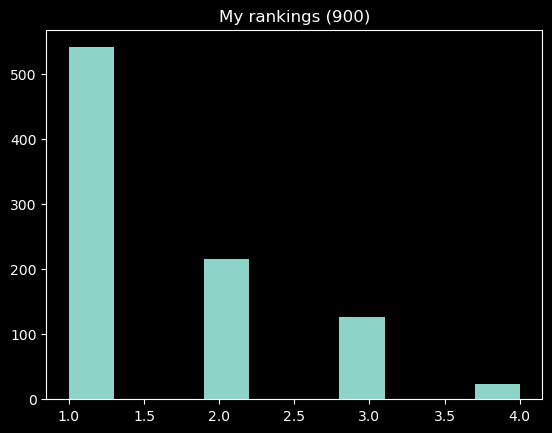

In [3]:
# Distribution of my rankings
data_all = pd.DataFrame(columns = data.columns)
for i in range(1, 8):
    if(i == 3): continue
    data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
    data_all = pd.concat((data_all, data), axis=0)

plt.figure()
plt.title('My rankings (900)')
plt.hist(data_all['Jimena'])
plt.show()

In [4]:
# calculating all classification rates
TPR_list, TNR_list, FPR_list = [], [], []
for i in range(1, 8):
    if(i == 3): continue
    data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
    data_pos = data[data['Jimena'] >= 3]
    data_neg = data[data['Jimena'] <= 2]
    #print(len(data_pos), len(data_neg))
    #print(' ')
    for name in (data.columns):
        if(len(name) < 8): continue
        TPR = len(data_pos[data_pos[name] >= 3])/len(data_pos)
        TNR = len(data_neg[data_neg[name] <= 2])/len(data_neg)
        FPR = len(data_neg[data_neg[name] >= 3])/len(data_neg)
        TPR_list.append(TPR)
        TNR_list.append(TNR)
        FPR_list.append(FPR)
        #Calculate purity rate:
        
        #print(TPR, TNR)

30


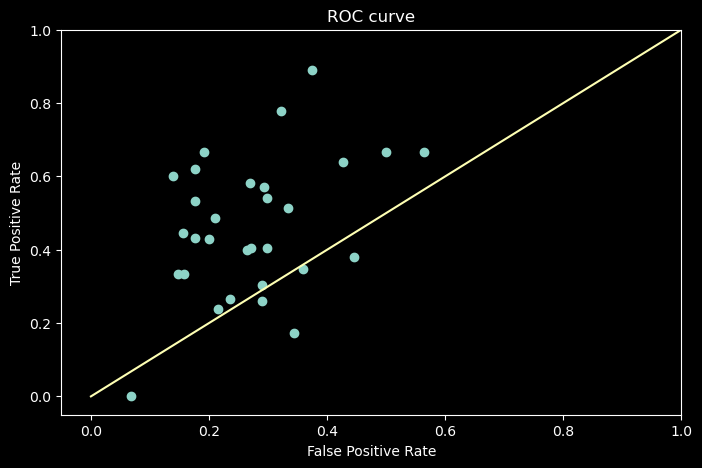

In [5]:
guessing = np.linspace(0, 1 , 10)
print(len(FPR_list))

plt.figure(figsize=(8,5))
plt.title('ROC curve')
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(FPR_list, TPR_list, 'o')
plt.plot(guessing, guessing)
plt.show()